# First let's import, then look for the assignment below

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.LangDef   import *  #-- mainly for nthnumeric
from jove.Def_md2mc import *  #-- for md2mc
from jove.Def_DFA   import *  #-- for all DFA functions
from jove.DotBashers import * #-- for dotObj_dfa
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

You may use any of these help commands:
help(lphi)
help(lunit)
help(lcat)
help(lexp)
help(lunion)
help(lstar)
help(srev)
help(lrev)
help(shomo)
help(lhomo)
help(powset)
help(lint)
help(lsymdiff)
help(lminus)
help(lissubset)
help(lissuperset)
help(lcomplem)
help(product)
help(nthnumeric)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR)
help(state_combos)
help(sepFinNonFin)
help(bash_eql_cl

# Assignment-2 Problem-2,3,4: Construct as requested

## 2 graded by SV; 3 by AR; 4 by LT

### BEFORE YOU SUBMIT THIS FILE, PLEASE RENAME THIS FILE BY REPLACING THE 0000000 IN THE FILE NAME WITH YOUR CORRECT UNID. KEEP THE "u" AT THE BEGINNING.

# Problem-2 graded by SV

<font size="4">    
1. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that accepts an even number of *non-overlapping occurrences* of  $010$s. Thoroughly document your construction!
    
HERE ARE EXAMPLES :

* 01010 - does NOT have an even number of 0's because we wanted NON-OVERLAPPING

* 0101010 - has two NON-OVERLAPPING occurrences of 010 -- that is what we want!

* 0101111010 - has two NON-OVERLAPPING occurrences of 010

* 111111 - has ZERO occurrences of 010
    
</font>

### Approach: We will name states to remember the essence of the history of inputs so far. If you do so, and also keep the sense of where the machine is (in an I state, an IF state or an F state), then you'll have the solution fall out automatically!

Please read the Jove_User_Manual and the advice given there regarding how to write your automaton markdowns, how to place comments, how to group the lines of a DFA per state, and how to order which transition you may first consider.


In [3]:
help(md2mc)
Even010 = md2mc('''
DFA 

!! we'll use six states grouped into threes.
!! 
!! each group keeps track of if it's on an odd or even number of '010's.
!! 
!! the three states in each group keeps track of the progress of the
!!   current '010' and whether it finishes.

IF   :0 -> F_0   !! the first '0' in an odd index of '010'. progresses.
IF   :1 -> IF    !! a '1' doesn't hurt before a sequence of '010' starts.
                 !! the initial state could be final since an empty string
                 !!   should be accepted.

F_0  :0 -> F_0   !! a '0' after the first '0' doesn't hurt since it can
                 !!   just be replace the first '0'.
F_0  :1 -> F_01  !! the '1' in an odd index of '010'. progresses.
                 !! this could a final state since an odd index of '010'
                 !!   has yet constructed.

F_01 :0 -> S_010 !! the second '0' in an odd index of '010'. progresses.
F_01 :1 -> IF    !! a '1' terminates a potential '010' sequence and
                 !!   forces it back to the start.
                 !! this could a final state since an odd index of '010'
                 !!   has yet constructed.

S_010:0 -> S_0   !! the first '0' in an even index of '010'. progresses.
S_010:1 -> S_010 !! a '1' doesn't hurt or help here.

S_0:0   -> S_0   !! a '0' doesn't hurt or help here.
S_0:1   -> S_01  !! the '1' in an even index of '010'. progresses.

S_01:0  -> IF    !! the second '0' in an even index of '010'. since it is
                 !!   an even number again, the string can now be accepted.
S_01:1  -> S_010 !! a '1' terminates a potential '010' sequence and forces
                 !!   it back to the start.
 
''')

Even010

Help on function md2mc in module jove.Def_md2mc:

md2mc(src='None', fname='None')
    md2mc converts a markdown source to a machine (mc).
    
    One can feed the markdown in three ways, shown via 
    pseudo-examples:
    
    1) md2mc()
    
       It means you will provide a file-name
       (you will be prompted for one). Then the markdown is read from
       that file. 
       
    2) md2mc(src="<any string S other than 'File'>")
    
       S is now taken as the markdown string and parsed. This is 
       bound to be a multi-line file. 
       
       There is a Jupyter bug that if the parser (or any process) 
       consuming a multi-line input throws an exception, you will get 
       a strange error message: 
       ERROR:root:An unexpected error occurred while tokenizing input
       Ignore it please, and instead spend your time fixing the 
       markdown input. See for details:
       https://github.com/ipython/ipython/issues/6864
       
       
    3) md2mc(src="File", f

{'Q': {'F_0', 'F_01', 'IF', 'S_0', 'S_01', 'S_010'},
 'Sigma': {'0', '1'},
 'Delta': {('IF', '0'): 'F_0',
  ('IF', '1'): 'IF',
  ('F_0', '0'): 'F_0',
  ('F_0', '1'): 'F_01',
  ('F_01', '0'): 'S_010',
  ('F_01', '1'): 'IF',
  ('S_010', '0'): 'S_0',
  ('S_010', '1'): 'S_010',
  ('S_0', '0'): 'S_0',
  ('S_0', '1'): 'S_01',
  ('S_01', '0'): 'IF',
  ('S_01', '1'): 'S_010'},
 'q0': 'IF',
 'F': {'F_0', 'F_01', 'IF'}}

Help on function dotObj_dfa in module jove.DotBashers:

dotObj_dfa(D, FuseEdges=False, dfaName='do_', STATENAME_MAXSIZE=20)
    In : D1 (DFA : partially consistent)
         dfaName (string)
         STATENAME_MAXSIZE : number
    Out: A dot object. 
    Generate a dot object representing the automaton. 
    Suppress "black-hole states".



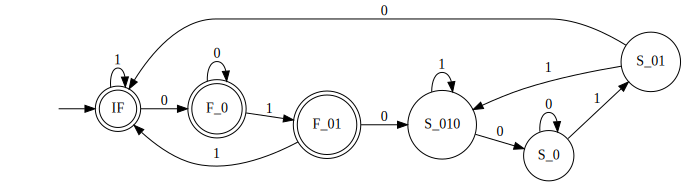

In [4]:
help(dotObj_dfa)
dotObj_dfa(Even010)

# Problem-3 graded by AR

<font size="4">    
3. Using Jove's markdown, define a DFA for the language of strings over alphabet $\{0,1\}$ that ends in a $010$, calling it Ends010. Then obtain the intersection with the Even010 machine using intersect_dfa. 
    
    Call the intersection Even010_Ends010.
    
    Next, minimize Even010_Ends010, storing it in min_Even010_Ends010 .
    
    Again, document the construction thoroughly.
    
</font>

### Approach: We will define a machine for "ends $010$" as illustrated in SV's part, and negate.

In [5]:
Ends010 =  md2mc('''
DFA

!! we'll use four states. each state records a character having occurred
!!   in the string of '010'.

I   :0 -> S_0  !! the first '0' in '010'. progresses.
I   :1 -> I    !! a '1' doesn't help.

S_0 :0 -> S_0  !! a '0' doesn't help.
S_0 :1 -> S_01 !! the '1' in '010'. progresses.

S_01:0 -> F    !! found the entire '010'. accepts.
S_01:1 -> I    !! found '011'. back to start.

F   :0 -> S_0  !! another '0' after pattern found, let's treat it as the
               !!   first one in the sequence.
F   :1 -> S_01  !! another '1' after pattern found, let's treat it as the
               !!   '1' in the sequence since we can replace the last '0'.

''')

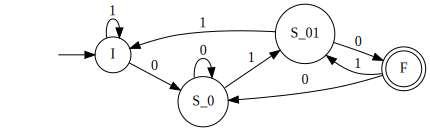

In [6]:
# Let's see the "Ends010" machine
dotObj_dfa(Ends010, FuseEdges=True)

## Obtain the intersection of Even010 and Ends010

Help on function intersect_dfa in module jove.Def_DFA:

intersect_dfa(D1in, D2in)
    In : D1in (consistent DFA)
         D2in (consistent DFA)
    Out: DFA for language intersection of D1in, D2in (consistent DFA).



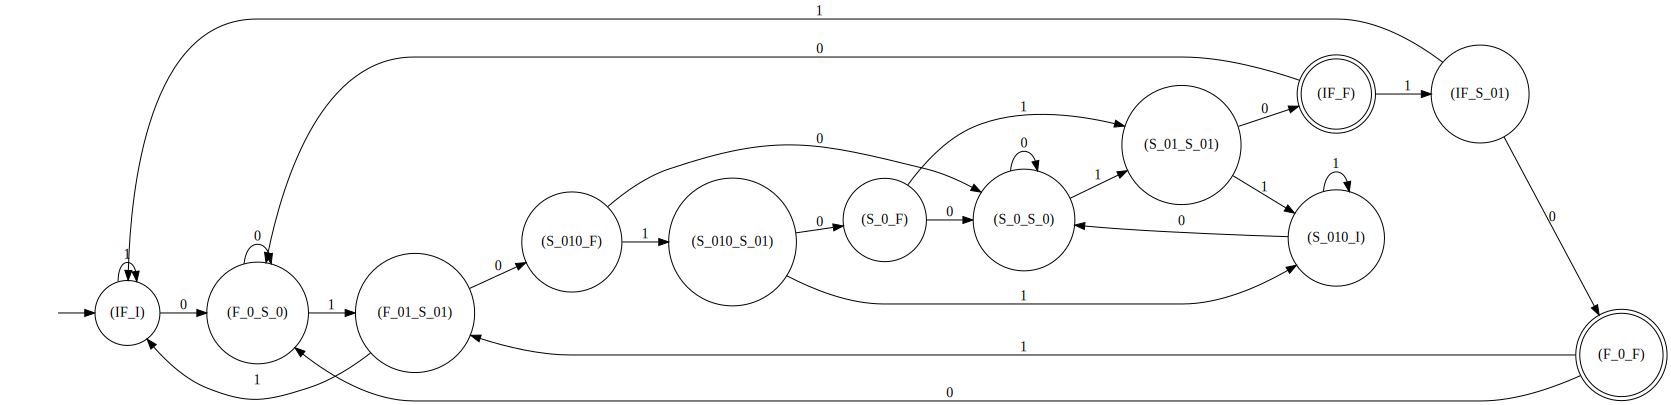

In [7]:
help(intersect_dfa)
Even010_Ends010 = intersect_dfa(Even010, Ends010)
dotObj_dfa(Even010_Ends010)

## Minimize the intersection of Even010 and Ends010

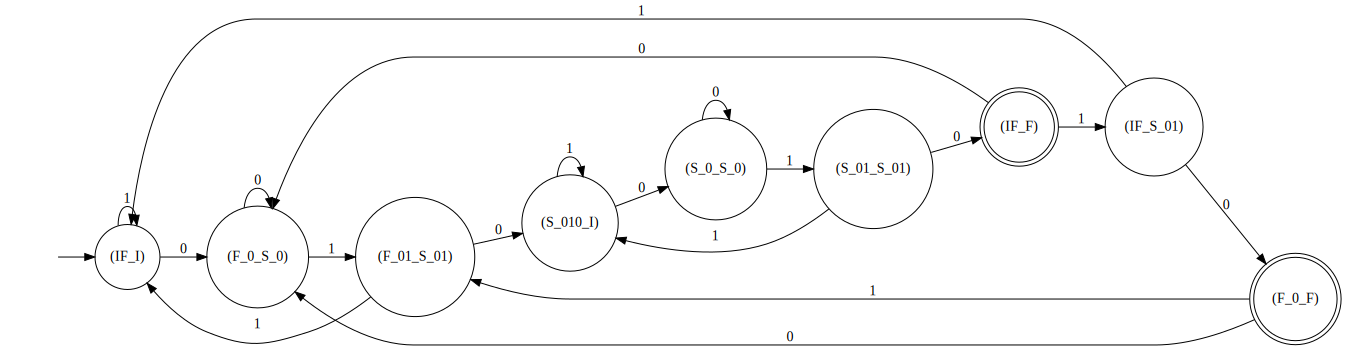

In [8]:
min_Even010_Ends010 = min_dfa(Even010_Ends010)
dotObj_dfa(min_Even010_Ends010)

# Problem-4 graded by LT

<font size="4">    
    
4.  Find out which states were eliminated in the Minimization Process. Explain why it was OK to leave these states out. Test the constructed machine using the template given to you. Finally use the Python "filter" function that filters out the accepted strings.
    
</font>

## Find out which states were eliminated

In [9]:
# Hint: You can obtain the components of a DFA D by using the notation D["Q"] where
# D is a DFA created using the md2mc command. Basically, "D" is a dictionary and 
# D["Q"] obtains the value of the key at "Q". See the lecture slides for Lec-3.

eliminated_states = Even010_Ends010["Q"] - min_Even010_Ends010["Q"]

print(eliminated_states)

{('S_010', 'F'), ('S_010', 'S_01'), ('S_0', 'F')}


## Explain why it is OK to leave these states out

<font size="4"> 
<!--... Your explanations here - a template of your answer is as follows ...-->

<!--**This template tries to limit the number of cases you have to list**-->


* I find that state (S_010, F) is present in `Even010_Ends010` but is absent in  `min_Even010_Ends010`
  - I can obtain this info by doing `Even010_Ends010["Q"] - min_Even010_Ends010["Q"]`
  - I can also eye-ball the diagrams and spot the missing state
  - But I recall that in the diagram, a state may show up S_010_F while in the `Even010_Ends010["Q"] - min_Even010_Ends010["Q"]` printout, it may show up as ('S_010','F')
 
 
 
<!--
* IF THERE ARE MULTIPLE *SOMESTATE1* that are missing in DFA2, PLEASE PICK THE ONE THAT INVOLVES STATE 'I'  and call that the *SOMESTATE1* for the remaining questions BELOW

P.S.: I don't even see a state involving the state 'I' in the output.
-->
 
 
 
 
* But I find that the string '010' who reached (S_010, F) in `Even010_Ends010` is now reaching state (S_010, I) in `min_Even010_Ends010`.
 
  * Thus I conclude that state (S_010, F) and (S_010, I) are equivalent
 
  * This is further confirmed by the fact that <!--(**here I am limiting your checks to 3 cases**)-->
    - upon 0, (S_010, F) goes to (S_0, S_0) while (S_010, I) goes to (S_0, S_0) and they are <!--BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)--> both non-accepting
    - upon 1, (S_010, F) goes to (S_010, S_01) while (S_010, I) goes to (S_010, I) and they are <!--BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)--> both non-accepting
    - upon 01, (S_010, F) goes to (S_01, S_01) while (S_010, I) goes to (S_01, S_01) and they are <!--BOTH ACCEPTING / BOTH NON-ACCEPTING (pick on)--> both non-accepting
 
 

 
 
    
</font>

# Testing the machine

In [10]:
help(nthnumeric)

Help on function nthnumeric in module jove.LangDef:

nthnumeric(N, S=['a', 'b'])
    Assume S ('Sigma') is a 2-sized list of chars (default ['a','b']). 
    Produce the Nth string in numeric order, where N >= 0.
    Idea : Given N, get b = floor(log_2(N+1)) - need that 
    many places; what to fill in the places is the binary 
    code for N - (2^b - 1) with 0 as S[0] and 1 as S[1].



## Test the constructed machine the "direct" way

In [11]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(256) ]

In [12]:
print(TestList)

['', '0', '1', '00', '01', '10', '11', '000', '001', '010', '011', '100', '101', '110', '111', '0000', '0001', '0010', '0011', '0100', '0101', '0110', '0111', '1000', '1001', '1010', '1011', '1100', '1101', '1110', '1111', '00000', '00001', '00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111', '000000', '000001', '000010', '000011', '000100', '000101', '000110', '000111', '001000', '001001', '001010', '001011', '001100', '001101', '001110', '001111', '010000', '010001', '010010', '010011', '010100', '010101', '010110', '010111', '011000', '011001', '011010', '011011', '011100', '011101', '011110', '011111', '100000', '100001', '100010', '100011', '100100', '100101', '100110', '100111', '101000', '101001', '101010', '101011', '101100', '101101', '101110', '101111', '110000',

In [13]:
help(accepts_dfa)

Help on function accepts_dfa in module jove.Def_DFA:

accepts_dfa(D, s)
    In : D (consistent DFA)
         s (string over D's sigma, including "")
    Out: Boolean (if state after s-run is in D's final).



In [14]:
for test in TestList:
    if accepts_dfa(min_Even010_Ends010, test):
        print(" min_Even010_Ends010 : accepts ", test)
    else:
        print(" min_Even010_Ends010 : does not accept ", test)

 min_Even010_Ends010 : does not accept  
 min_Even010_Ends010 : does not accept  0
 min_Even010_Ends010 : does not accept  1
 min_Even010_Ends010 : does not accept  00
 min_Even010_Ends010 : does not accept  01
 min_Even010_Ends010 : does not accept  10
 min_Even010_Ends010 : does not accept  11
 min_Even010_Ends010 : does not accept  000
 min_Even010_Ends010 : does not accept  001
 min_Even010_Ends010 : does not accept  010
 min_Even010_Ends010 : does not accept  011
 min_Even010_Ends010 : does not accept  100
 min_Even010_Ends010 : does not accept  101
 min_Even010_Ends010 : does not accept  110
 min_Even010_Ends010 : does not accept  111
 min_Even010_Ends010 : does not accept  0000
 min_Even010_Ends010 : does not accept  0001
 min_Even010_Ends010 : does not accept  0010
 min_Even010_Ends010 : does not accept  0011
 min_Even010_Ends010 : does not accept  0100
 min_Even010_Ends010 : does not accept  0101
 min_Even010_Ends010 : does not accept  0110
 min_Even010_Ends010 : does not acce

## Use Python's "filter" function to filter out the accepted strings directly

In [15]:
list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))

['010010', '0010010', '0100010', '0101010', '1010010']

## Doubled the testing range; now finding at least ten strings !!

In [16]:
TestList = [ nthnumeric(i, ['0','1']) for i in range(512) ]

test_results = list(filter(lambda x: accepts_dfa(min_Even010_Ends010, x), TestList))
print(len(test_results))
print(test_results)

16
['010010', '0010010', '0100010', '0101010', '1010010', '00010010', '00100010', '00101010', '01000010', '01001010', '01010010', '01011010', '10010010', '10100010', '10101010', '11010010']


# END